# **Gender Name Classification**
## **Luki Prasetyo**
### *https://www.dicoding.com/users/lukiprasetyo*
1nd Submission Task for "Machine Learning Developer - Machine Learning Terapan"

## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
warnings.filterwarnings("ignore")
%matplotlib inline

## Load Dataset

In [2]:
!wget --no-check-certificate \
  https://archive.ics.uci.edu/ml/machine-learning-databases/00591/name_gender_dataset.csv

--2022-11-12 07:34:50--  https://archive.ics.uci.edu/ml/machine-learning-databases/00591/name_gender_dataset.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3774591 (3.6M) [application/x-httpd-php]
Saving to: ‘name_gender_dataset.csv.1’

name_gender_dataset 100%[===================>]   3.60M  14.3MB/s    in 0.3s    

2022-11-12 07:34:51 (14.3 MB/s) - ‘name_gender_dataset.csv.1’ saved [3774591/3774591]



In [3]:
df = pd.read_csv(r'name_gender_dataset.csv')
df.sort_values(by='Name', ascending=True)

,Name,Gender,Count,Probability
114150,A,M,2,5.473480e-09
112246,A,F,2,5.473480e-09
115618,A'Aff,F,1,2.736740e-09
133954,A'Aron,M,1,2.736740e-09
115619,A'Dele,F,1,2.736740e-09
...,...,...,...,...
110558,Zyvion,M,5,1.368370e-08
90632,Zyvon,M,7,1.915720e-08
94120,Zyyanna,F,6,1.642040e-08
96225,Zyyon,M,6,1.642040e-08


In [4]:
df.describe()

,Count,Probability
count,1.472690e+05,1.472690e+05
mean,2.481161e+03,6.790295e-06
std,4.645472e+04,1.271345e-04
min,1.000000e+00,2.736740e-09
25%,5.000000e+00,1.368370e-08
50%,1.700000e+01,4.652460e-08
75%,1.320000e+02,3.612500e-07
max,5.304407e+06,1.451679e-02


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147269 entries, 0 to 147268
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Name         147269 non-null  object 
 1   Gender       147269 non-null  object 
 2   Count        147269 non-null  int64  
 3   Probability  147269 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.5+ MB


## Data Visualization

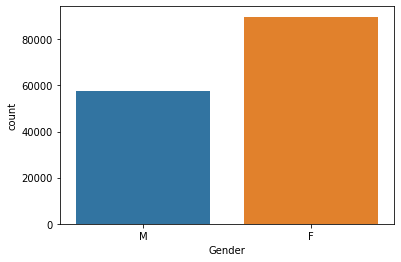

In [6]:
sns.countplot('Gender', data=df)

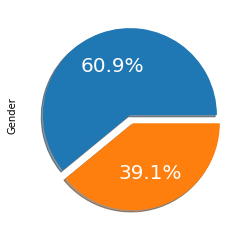

In [7]:
df['Gender'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', textprops={'color':"w", 'fontsize':'20'},shadow=True)

```
There is a significant difference between Men and Women regardless of the number in each name available
```

In [8]:
df2 = df.groupby('Gender').sum().reset_index()
df2.head()

,Gender,Count,Probability
0,F,180623104,0.494319
1,M,184775046,0.505681


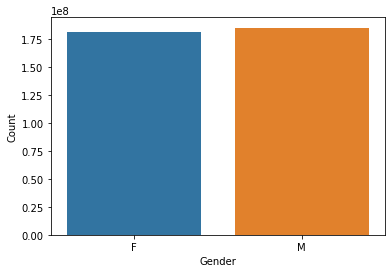

In [9]:
sns.barplot(x="Gender", y="Count", data=df2)

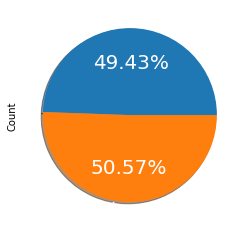

In [10]:
df2['Count'].plot.pie(autopct='%1.2f%%', textprops={'color':"w", 'fontsize':'20'},shadow=True, labels = ["Female", "Male"])

```
If we look at the comparison between men and women with the number in each name, then the difference in the number is the same between men and women.
```

## Data Preparation and Feature Engineering

### Categorize Data
```
add a column to categorize different names into a male or female bucket based on whether or not the frequency of males for a name outnumbers the frequency of females.
```

In [11]:
namechart = df.reset_index().pivot('Name', 'Gender', 'Count')
namechart = namechart.fillna(0)
namechart["percent_male"] = ((namechart["M"] - namechart["F"])/ (namechart["M"] + namechart["F"]))
namechart['gender'] = np.where(namechart['percent_male'] > 0.001, 'Male', 'Female')
namechart

Gender,F,M,percent_male,gender
Name,,,,
A,2.0,2.0,0.0,Female
A'Aff,1.0,0.0,-1.0,Female
A'Aron,0.0,1.0,1.0,Male
A'Dele,1.0,0.0,-1.0,Female
A'Isha,1.0,0.0,-1.0,Female
...,...,...,...,...
Zyvion,0.0,5.0,1.0,Male
Zyvon,0.0,7.0,1.0,Male
Zyyanna,6.0,0.0,-1.0,Female


### Transforming Text to Vector

In [12]:
char_v = CountVectorizer(analyzer='char', ngram_range=(2, 2))
X = char_v.fit_transform(namechart.index)
X = X.tocsc()
y = (namechart.gender == 'Male').values.astype(np.int)
print(X)

  (13838, 0)	1
  (1, 1)	1
  (2, 1)	1
  (16392, 1)	1
  (17169, 1)	1
  (18875, 1)	1
  (20928, 1)	1
  (26435, 1)	1
  (26436, 1)	1
  (26437, 1)	1
  (26438, 1)	1
  (26439, 1)	1
  (26440, 1)	1
  (26441, 1)	1
  (26442, 1)	1
  (26443, 1)	1
  (26444, 1)	1
  (26445, 1)	1
  (29242, 1)	1
  (29243, 1)	1
  (41502, 1)	1
  (49621, 1)	1
  (50117, 1)	1
  (53949, 1)	1
  (57452, 1)	1
  :	:
  (125386, 870)	1
  (125387, 870)	1
  (125388, 870)	1
  (125768, 870)	1
  (127010, 870)	1
  (127048, 870)	1
  (129918, 870)	1
  (130186, 870)	1
  (130187, 870)	1
  (130188, 870)	1
  (130189, 870)	1
  (130601, 870)	1
  (131161, 870)	1
  (132572, 870)	2
  (133909, 870)	1
  (82931, 871)	1
  (76404, 872)	1
  (7292, 873)	1
  (124939, 874)	1
  (116114, 875)	1
  (100727, 876)	1
  (6878, 877)	1
  (41500, 877)	1
  (77497, 878)	1
  (82404, 878)	1


### Splitting train and validation sets

In [13]:
train, test = train_test_split(range(namechart.shape[0]), train_size=0.7, random_state=25)
mask=np.ones(namechart.shape[0], dtype='int')
mask[train]=1
mask[test]=0
mask = (mask==1)

## Creating and Training the Model

In [14]:
X_train=X[mask]
y_train=y[mask]
X_test=X[~mask]
y_test=y[~mask]

In [15]:
MNB = MultinomialNB(alpha=1)
MNB.fit(X_train, y_train)
NB_train_acc = round(MNB.score(X_train, y_train) *100, 2)
NB_test_acc = round(MNB.score(X_test, y_test) *100, 2)
        
print(NB_train_acc)
print(NB_test_acc)

72.72
72.1


In [16]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
log_train_acc = round(logreg.score(X_train, y_train) * 100, 2)
log_test_acc = round(logreg.score(X_test, y_test) * 100, 2)

print(log_train_acc)
print(log_test_acc)

79.73
79.19


In [17]:
DT = DecisionTreeClassifier(max_depth=15, random_state=42)
DT.fit(X_train, y_train)
DT_train_acc = round(DT.score(X_train, y_train) * 100, 2)
DT_test_acc = round(DT.score(X_test, y_test) * 100, 2)

print(DT_train_acc)
print(DT_test_acc)

74.19
72.24


In [18]:
models = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression', 'Decision Tree'],
    'Train_Score': [NB_train_acc, log_train_acc, DT_train_acc],
    'Test_Score': [NB_test_acc, log_test_acc, DT_test_acc]})
models.sort_values(by='Train_Score', ascending=False)

,Model,Train_Score,Test_Score
1,Logistic Regression,79.73,79.19
2,Decision Tree,74.19,72.24
0,Naive Bayes,72.72,72.10


In [53]:
param_grid = {
    'penalty' : ['l1', 'l2'],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [54]:
LR = LogisticRegression()
clf = GridSearchCV(LR, param_grid = param_grid, cv = 25, verbose=3, scoring='accuracy')

In [55]:
best_clf = clf.fit(X_train, y_train)

Fitting 25 folds for each of 6 candidates, totalling 150 fits
[CV 1/25] END .......penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/25] END .......penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/25] END .......penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/25] END .......penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/25] END .......penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 6/25] END .......penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 7/25] END .......penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 8/25] END .......penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 9/25] END .......penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 10/25] END ......penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 11/25] END ......penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 12/25] END ......penalty=l1, solver=newton-

In [56]:
print('Best Penalty:', best_clf.best_estimator_.get_params()['penalty'])
print('Best C:', best_clf.best_estimator_.get_params()['C'])
print('Best Solver:', best_clf.best_estimator_.get_params()['solver'])

Best Penalty: l2
Best C: 1.0
Best Solver: lbfgs


In [57]:
LR_train_acc = round(best_clf.score(X_train, y_train) * 100, 2)
LR_test_acc = round(best_clf.score(X_test, y_test) * 100, 2)
y_pred = best_clf.predict(X_test)
print(LR_train_acc)
print(LR_test_acc)

79.73
79.19


## Testing Prediciton

In [58]:
def test_name(x):
    str(x)
    new = char_v.transform([x])
    y_pred = best_clf.predict(new)
    if (y_pred == 1):
        print("This name most likely a male name")
    else:
        print("This name most likely a female name")

In [59]:
test_name('Virel')

This name most likely a male name


In [60]:
test_name('Linda')

This name most likely a female name
